In [2]:
import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from math import log

In [127]:
ds = pd.read_csv("https://abe-southside-final-project.s3.us-east-2.amazonaws.com/loan-2018.csv")
ds

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_actv_rev_tl
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,140.0,212,1,1,0,1.0,NaN,2.0,NaN,5
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,163.0,378,4,3,3,4.0,NaN,4.0,NaN,4
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,87.0,92,15,14,2,77.0,NaN,14.0,NaN,3
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,62.0,154,64,5,3,64.0,NaN,5.0,NaN,2
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,53.0,216,2,2,2,2.0,NaN,13.0,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349994,NaN,NaN,10000,10000,9750.0,36 months,11.98,332.05,B,B5,...,84.0,243,1,1,0,3.0,18.0,3.0,16.0,13
349995,NaN,NaN,10000,10000,10000.0,36 months,9.92,322.30,B,B2,...,144.0,59,0,0,3,0.0,NaN,0.0,NaN,2
349996,NaN,NaN,10000,10000,10000.0,36 months,6.71,307.45,A,A3,...,151.0,123,30,10,0,30.0,45.0,NaN,45.0,4
349997,NaN,NaN,15000,15000,15000.0,60 months,18.45,384.59,D,D2,...,55.0,79,12,10,0,12.0,NaN,10.0,NaN,2


# Cars Dataset
### Reading Cars csv

In [128]:
ds2 = pd.read_csv("https://abe-southside-final-project.s3.us-east-2.amazonaws.com/USA_cars_datasets.csv")
ds2

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,2494,7800,nissan,versa,2019,clean vehicle,23609.0,red,3n1cn7ap9kl880319,167722715,california,usa,1 days left
2495,2495,9200,nissan,versa,2018,clean vehicle,34553.0,silver,3n1cn7ap5jl884088,167762225,florida,usa,21 hours left
2496,2496,9200,nissan,versa,2018,clean vehicle,31594.0,silver,3n1cn7ap9jl884191,167762226,florida,usa,21 hours left
2497,2497,9200,nissan,versa,2018,clean vehicle,32557.0,black,3n1cn7ap3jl883263,167762227,florida,usa,2 days left


### Cleaning Cars Dataset

In [129]:
ds2 = ds2[["price", "brand", "model", "year", "title_status", "mileage", "color", "state"]]
ds2

,price,brand,model,year,title_status,mileage,color,state
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey
1,2899,ford,se,2011,clean vehicle,190552.0,silver,tennessee
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,georgia
3,25000,ford,door,2014,clean vehicle,64146.0,blue,virginia
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,florida
...,...,...,...,...,...,...,...,...
2494,7800,nissan,versa,2019,clean vehicle,23609.0,red,california
2495,9200,nissan,versa,2018,clean vehicle,34553.0,silver,florida
2496,9200,nissan,versa,2018,clean vehicle,31594.0,silver,florida
2497,9200,nissan,versa,2018,clean vehicle,32557.0,black,florida


In [130]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

In [131]:
# Load the Iris Dataset
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [133]:
# Create a random forest classifier
ds2 = ds2(iris.data, iris.target)
ds2.score(iris.data, iris.target)

TypeError: 'DataFrame' object is not callable

## Cars Data Processing

In [109]:
X = pd.get_dummies(ds2[["price", "brand", "model", "year", "title_status", "color", "state"]])
y = ds2["mileage"].values.reshape(-1,1)
print(X.shape, y.shape)

(2499, 252) (2499, 1)


# Scaling and Normalization

In [110]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [111]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [112]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [113]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.6782283884738527
Testing Data Score: 0.0048


# Standardscaler

In [114]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [115]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

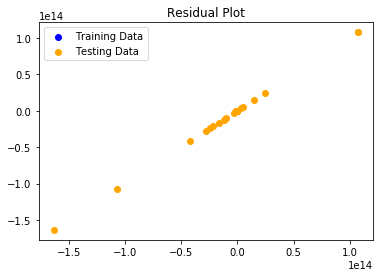

In [116]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

# Data Cleaning

In [16]:
ds = ds[["funded_amnt", "emp_length", "annual_inc", "home_ownership", "grade", "last_pymnt_amnt", "mort_acc", "pub_rec", "int_rate", "open_acc", "num_actv_rev_tl", "mo_sin_rcnt_rev_tl_op", "mo_sin_old_rev_tl_op", "bc_util", "bc_open_to_buy", "avg_cur_bal", "acc_open_past_24mths", "loan_status"]]
ds.head()

,funded_amnt,emp_length,annual_inc,home_ownership,grade,last_pymnt_amnt,mort_acc,pub_rec,int_rate,open_acc,num_actv_rev_tl,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,bc_util,bc_open_to_buy,avg_cur_bal,acc_open_past_24mths,loan_status
0,2500,10+ years,55000.0,RENT,C,84.92,0,1,13.56,9,5,1,212,5.9,34360.0,1878.0,9,Current
1,30000,10+ years,90000.0,MORTGAGE,D,777.23,3,1,18.94,13,4,4,378,8.3,13761.0,24763.0,10,Current
2,5000,6 years,59280.0,MORTGAGE,D,180.69,2,0,17.97,8,3,15,92,0.0,13800.0,18383.0,4,Current
3,4000,10+ years,92000.0,MORTGAGE,D,146.51,3,0,18.94,10,2,64,154,75.2,1239.0,30505.0,5,Current
4,30000,10+ years,57250.0,MORTGAGE,C,731.78,2,0,16.14,12,2,2,216,8.9,8471.0,9667.0,9,Current
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349994,10000,6 years,82000.0,RENT,B,332.05,0,1,11.98,16,13,1,243,34.1,15890.0,1475.0,6,Current
349995,10000,10+ years,100000.0,OWN,B,322.30,3,0,9.92,4,2,0,59,6.6,22884.0,404.0,3,Current
349996,10000,5 years,44000.0,RENT,A,307.45,0,0,6.71,11,4,30,123,55.7,7313.0,7972.0,1,Current
349997,15000,1 year,41000.0,RENT,D,384.59,0,0,18.45,5,2,12,79,57.0,3378.0,4535.0,2,Current


In [15]:
print("Current shape of dataset :",ds.shape)

Current shape of dataset : (349999, 18)


In [14]:
X = ds[["funded_amnt", "emp_length", "annual_inc", "home_ownership", "grade", "last_pymnt_amnt", "mort_acc", "pub_rec", "int_rate", "open_acc", "num_actv_rev_tl", "mo_sin_rcnt_rev_tl_op", "mo_sin_old_rev_tl_op", "bc_util", "bc_open_to_buy", "avg_cur_bal", "acc_open_past_24mths", "loan_status"]]
y = ds["loan_status"].values.reshape(-1,1)
print(X.shape, y.shape)

(349999, 18) (349999, 1)


In [19]:
# data = X.copy()

# data_binary_encoded = pd.get_dummies(data, columns=["grade"])
# data_binary_encoded.head()
data = X.copy()

data_binary_encoded = pd.get_dummies(data)
data_binary_encoded

,funded_amnt,annual_inc,last_pymnt_amnt,mort_acc,pub_rec,int_rate,open_acc,num_actv_rev_tl,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,...,grade_E,grade_F,grade_G,loan_status_Charged Off,loan_status_Current,loan_status_Default,loan_status_Fully Paid,loan_status_In Grace Period,loan_status_Late (16-30 days),loan_status_Late (31-120 days)
0,2500,55000.0,84.92,0,1,13.56,9,5,1,212,...,0,0,0,0,1,0,0,0,0,0
1,30000,90000.0,777.23,3,1,18.94,13,4,4,378,...,0,0,0,0,1,0,0,0,0,0
2,5000,59280.0,180.69,2,0,17.97,8,3,15,92,...,0,0,0,0,1,0,0,0,0,0
3,4000,92000.0,146.51,3,0,18.94,10,2,64,154,...,0,0,0,0,1,0,0,0,0,0
4,30000,57250.0,731.78,2,0,16.14,12,2,2,216,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349994,10000,82000.0,332.05,0,1,11.98,16,13,1,243,...,0,0,0,0,1,0,0,0,0,0
349995,10000,100000.0,322.30,3,0,9.92,4,2,0,59,...,0,0,0,0,1,0,0,0,0,0
349996,10000,44000.0,307.45,0,0,6.71,11,4,30,123,...,0,0,0,0,1,0,0,0,0,0
349997,15000,41000.0,384.59,0,0,18.45,5,2,12,79,...,0,0,0,0,1,0,0,0,0,0


In [40]:
# data_binary_encoded.loc[data_binary_encoded['loan_status_Default'] == 1,:]

,funded_amnt,annual_inc,last_pymnt_amnt,mort_acc,pub_rec,int_rate,open_acc,num_actv_rev_tl,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,...,grade_E,grade_F,grade_G,loan_status_Charged Off,loan_status_Current,loan_status_Default,loan_status_Fully Paid,loan_status_In Grace Period,loan_status_Late (16-30 days),loan_status_Late (31-120 days)
0,0,0.0,0.00,0,0,0.00,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0.0,0.00,0,0,0.00,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,5000,59280.0,180.69,2,0,17.97,8,3,15,92,...,0,0,0,0,1,1,0,0,0,0
3,4000,92000.0,146.51,3,0,18.94,10,2,64,154,...,0,0,0,0,1,1,0,0,0,0
4,30000,57250.0,731.78,2,0,16.14,12,2,2,216,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349994,10000,82000.0,332.05,0,1,11.98,16,13,1,243,...,0,0,0,0,1,1,0,0,0,0
349995,10000,100000.0,322.30,3,0,9.92,4,2,0,59,...,0,0,0,0,1,1,0,0,0,0
349996,10000,44000.0,307.45,0,0,6.71,11,4,30,123,...,0,0,0,0,1,1,0,0,0,0
349997,15000,41000.0,384.59,0,0,18.45,5,2,12,79,...,0,0,0,0,1,1,0,0,0,0
